In [1]:
#First stages of capstone2, reading in the data and examining it
import numpy as np
import pandas as pd

In [2]:
cancer_train=pd.read_csv('data_set_ALL_AML_train.csv')

In [3]:
len(cancer_train)

7129

In [4]:
cancer_train.head(2)

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A


In [5]:
#rearrange data with calls at the end
col_calls=[i*2+1 for i in range(1,39)]
col_raw=[i*2 for i in range(1,39)]
both=col_raw+col_calls
both.insert(0,0)
both.insert(1,1)
cancer_clean=cancer_train.iloc[:,both]
cancer_clean.head(2).T

,0,1
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at
1,-214,-153
2,-139,-73
3,-76,-49
...,...,...
call.33,A,A
call.34,A,A
call.35,A,A
call.36,A,A


In [6]:
#columns are not in numerical order
cancer_clean.columns.values

array(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '34', '35', '36', '37', '38', '28', '29', '30', '31', '32', '33',
       'call', 'call.1', 'call.2', 'call.3', 'call.4', 'call.5', 'call.6',
       'call.7', 'call.8', 'call.9', 'call.10', 'call.11', 'call.12',
       'call.13', 'call.14', 'call.15', 'call.16', 'call.17', 'call.18',
       'call.19', 'call.20', 'call.21', 'call.22', 'call.23', 'call.24',
       'call.25', 'call.26', 'call.27', 'call.28', 'call.29', 'call.30',
       'call.31', 'call.32', 'call.33', 'call.34', 'call.35', 'call.36',
       'call.37'], dtype=object)

In [7]:
bothn=[i for i in range(79)]
new_column_order=bothn[0:29]+bothn[34:40]+bothn[29:34]+bothn[40:69]+bothn[74:78]+bothn[69:74]
cancer_new=cancer_clean.iloc[:,new_column_order]
cancer_new.columns.values
#correct order with calls at the end

array(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       'call', 'call.1', 'call.2', 'call.3', 'call.4', 'call.5', 'call.6',
       'call.7', 'call.8', 'call.9', 'call.10', 'call.11', 'call.12',
       'call.13', 'call.14', 'call.15', 'call.16', 'call.17', 'call.18',
       'call.19', 'call.20', 'call.21', 'call.22', 'call.23', 'call.24',
       'call.25', 'call.26', 'call.27', 'call.28', 'call.34', 'call.35',
       'call.36', 'call.37', 'call.29', 'call.30', 'call.31', 'call.32',
       'call.33'], dtype=object)

In [8]:
#filter all calls= P,M,A, my hack method
cancer_marginal=cancer_new.copy()
cancer_absent=cancer_new.copy()
for item in range(40,78):
    cancer_new=cancer_new[cancer_new.iloc[:,item]=='P']
    cancer_marginal=cancer_marginal[(cancer_marginal.iloc[:,item]=='M') | (cancer_marginal.iloc[:,item]=='P')] 
    cancer_absent=cancer_absent[cancer_absent.iloc[:,item]=='A']    
#len(cancer_new)
#len(cancer_marginal)
len(cancer_absent)
cancer_absent.head(2).T

,0,1
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at
1,-214,-153
2,-139,-73
3,-76,-49
...,...,...
call.29,A,A
call.30,A,A
call.31,A,A
call.32,A,A


In [9]:
#only 450 features now for all pass data. look at first 5 columns of data in different dataframes

print(cancer_new.mean(),cancer_absent.mean(),cancer_marginal.mean())
print(abs(cancer_new.mean()-cancer_marginal.mean()))
#not too much difference between p and p+m

1     5597.937778
2     6372.902222
3     6188.137778
4     5746.406667
5     6279.566667
6     5463.342222
7     5405.975556
8     5458.740000
9     7000.900000
10    5894.428889
11    6164.362222
12    5281.020000
13    5967.062222
14    5949.333333
15    6415.855556
16    5899.555556
17    6786.726667
18    5317.828889
19    5423.157778
20    7784.733333
21    6207.064444
22    5171.044444
23    5359.206667
24    6187.373333
25    5638.800000
26    5588.173333
27    5254.017778
28    6049.260000
29    5544.388889
30    6268.486667
31    5639.860000
32    5889.555556
33    5905.824444
34    5842.711111
35    4964.024444
36    6016.484444
37    5984.853333
38    5799.577778
dtype: float64 1    -103.990897
2    -112.851161
3    -147.889850
4    -134.106509
5     -44.448794
6    -108.774238
7    -134.025944
8    -189.931725
9    -114.467456
10    -68.147019
11    -79.654529
12    -89.840692
13    -63.781520
14    -95.263086
15    -67.355485
16    -65.318616
17   -180.508876
18    -51.72

array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>]], dtype=object)

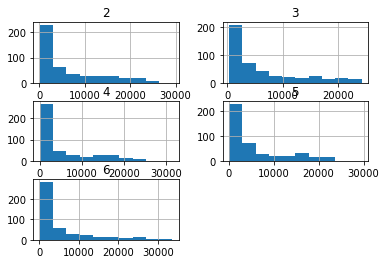

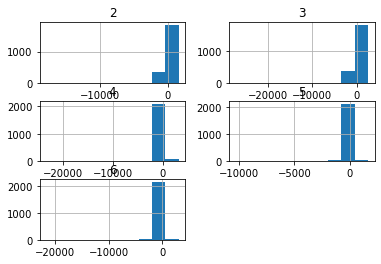

In [10]:
columns=['2','3','4','5','6']
cancer_new.hist(columns)
cancer_absent.hist(columns)

In [11]:
#pip install pandas-profiling
import pandas_profiling
#cancer_new.profile_report()   
# file too big to save, so commented out profile

In [12]:
cancer_pass=cancer_new[cancer_new.columns[0:40]]
cancer_pass.head(1)
cancer_pass.to_csv('cancer_pass.csv')